In [ ]:
library(tidyverse)

In [ ]:
data = read.csv('/content/sample_data/heart.csv')

In [ ]:
head(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [ ]:
tail(data)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
298,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
ncol(data)

[1] 14

In [ ]:
nrow(data)


[1] 303

In [ ]:
summary(data)


      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

In [ ]:
# Data transformation
data2 = data %>%
  mutate(sex = if_else(sex ==1, 'MALE', 'FEMALE'),
        fbs = if_else(fbs == 1, '>120', '<=120'),
        exang = if_else(exang == 1, 'YES', 'NO'),
        cp = if_else(cp == 1, 'ATYPICAL ANGINA',
                     if_else(cp == 2, 'NON-ANGINAL PAIN','ASYMPTOMATIC')),
        restecg = if_else(restecg == 0, 'NORMAL',
                     if_else(restecg == 1, 'ABNORMALITY','PROBABLE OR DEFINITE')),
        slope = as.factor(slope),
        ca = as.factor(ca),
        thal = as.factor(thal),
        target = if_else(target == 1, 'YES','NO')
) %>%
mutate_if(is.character, as.factor) %>%
dplyr::select(target, sex, fbs, exang, restecg, slope, ca, thal, everything())



In [ ]:
head(data2)


,target,sex,fbs,exang,restecg,slope,ca,thal,age,cp,trestbps,chol,thalach,oldpeak
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<dbl>
1,YES,MALE,>120,NO,NORMAL,0,0,1,63,ASYMPTOMATIC,145,233,150,2.3
2,YES,MALE,<=120,NO,ABNORMALITY,0,0,2,37,NON-ANGINAL PAIN,130,250,187,3.5
3,YES,FEMALE,<=120,NO,NORMAL,2,0,2,41,ATYPICAL ANGINA,130,204,172,1.4
4,YES,MALE,<=120,NO,ABNORMALITY,2,0,2,56,ATYPICAL ANGINA,120,236,178,0.8
5,YES,FEMALE,<=120,YES,ABNORMALITY,2,0,2,57,ASYMPTOMATIC,120,354,163,0.6
6,YES,MALE,<=120,NO,ABNORMALITY,1,0,1,57,ASYMPTOMATIC,140,192,148,0.4


#### Data Visualiztion

In [ ]:
install.packages('ggplot2')
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“Use of `data2$target` is discouraged.
ℹ Use `target` instead.”
Warning message:
“Use of `data2$target` is discouraged.
ℹ Use `target` instead.”


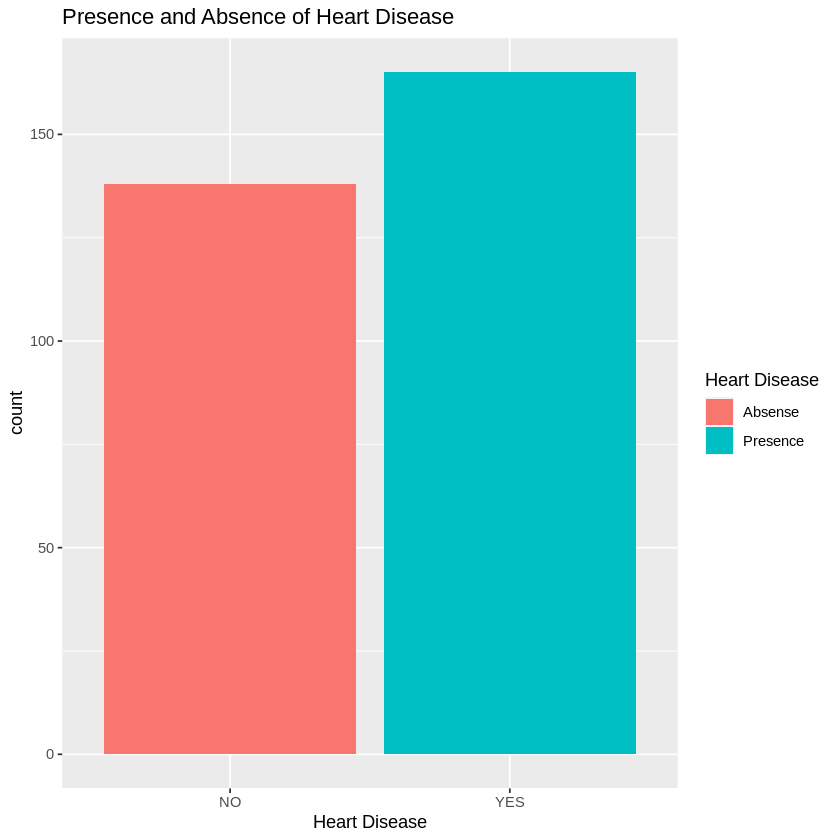

In [ ]:
# Bar chart to visualize the absense and presence of heart disease in the dataset
ggplot(data2, aes(x = data2$target, fill = data2$target)) +
geom_bar()+
xlab('Heart Disease') +
ylab('count') +
ggtitle("Presence and Absence of Heart Disease") +
scale_fill_discrete(name = 'Heart Disease', labels = c('Absense', 'Presence'))

In [ ]:
# Percentage of people in the dataset having heart disease
prop.table(table(data2$target))



       NO       YES 
0.4554455 0.5445545 

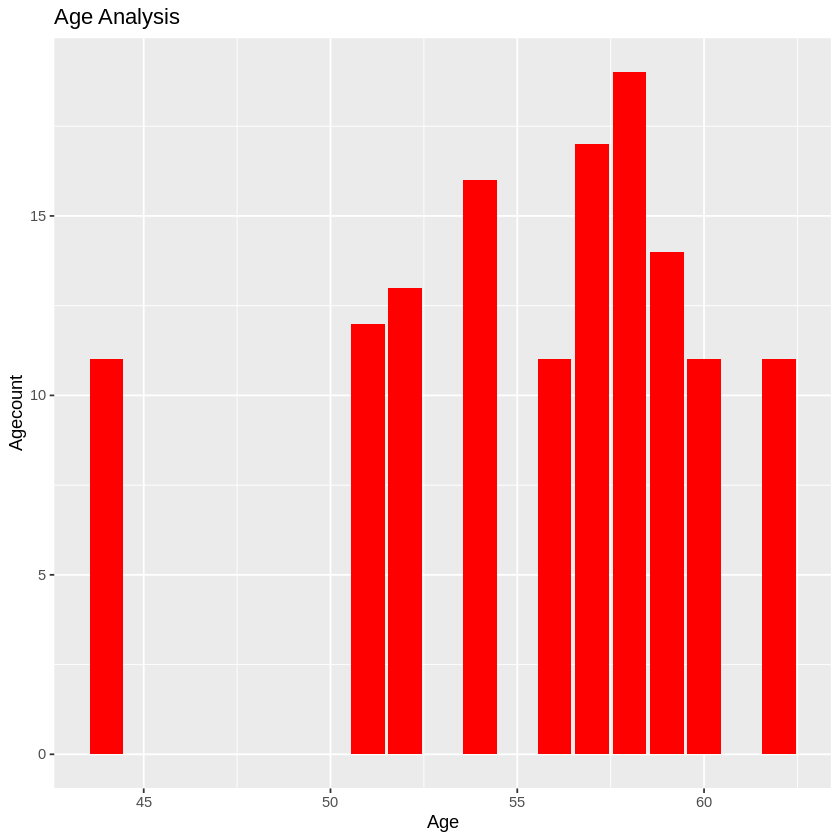

In [ ]:
# Age distribution of the people in dataset
data2 %>%
  group_by(age) %>%
    count() %>%
    filter(n>10) %>%
    ggplot() +
    geom_col(aes(age, n), fill = 'red') +
    ggtitle('Age Analysis') +
    xlab('Age') +
    ylab('Agecount')

It can be concluded that the age disctibution is skewed to the right side, which basically means that most people are in the range of 55-60, as
compared to lower age groups


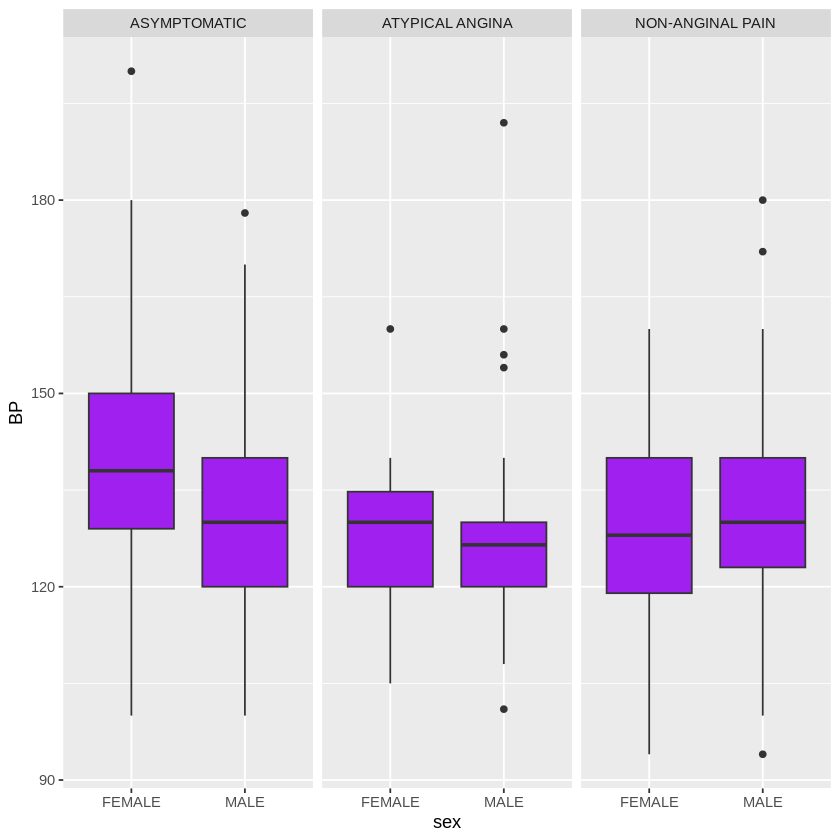

In [ ]:
# Comparing blood pressure across chest pain (with processed data)
data2 %>%
ggplot(aes(x=sex, y=trestbps))+
geom_boxplot(fill ='purple')+
xlab('sex')+
ylab('BP')+
facet_grid(~cp)


Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


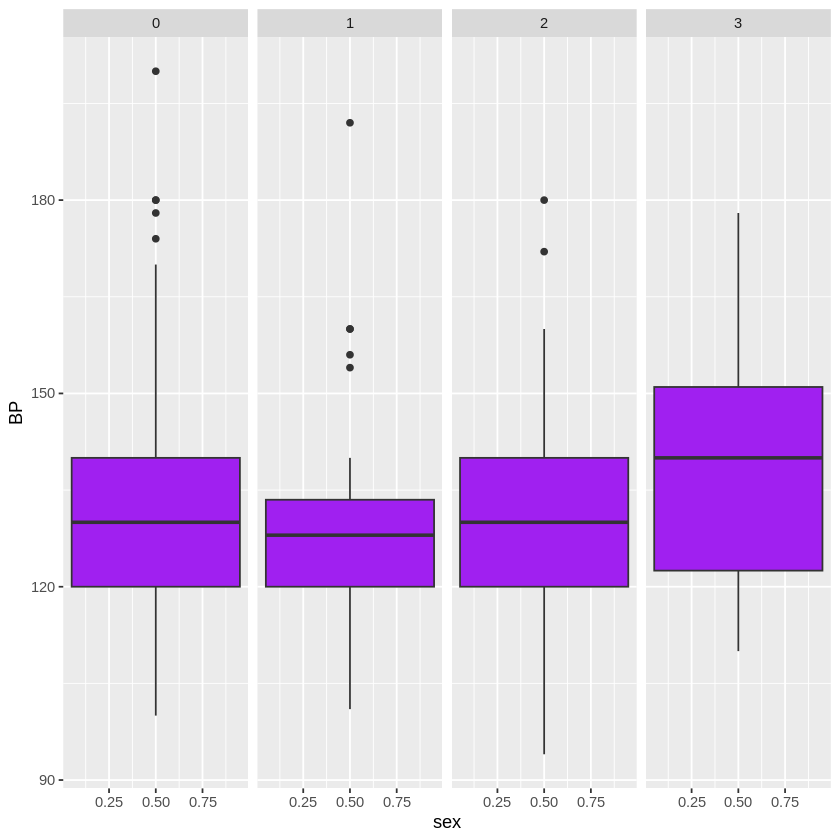

In [ ]:
# Comparing blood pressure across chest pain (with original data)
data %>%
ggplot(aes(x=sex, y=trestbps))+
geom_boxplot(fill ='purple')+
xlab('sex')+
ylab('BP')+
facet_grid(~cp)


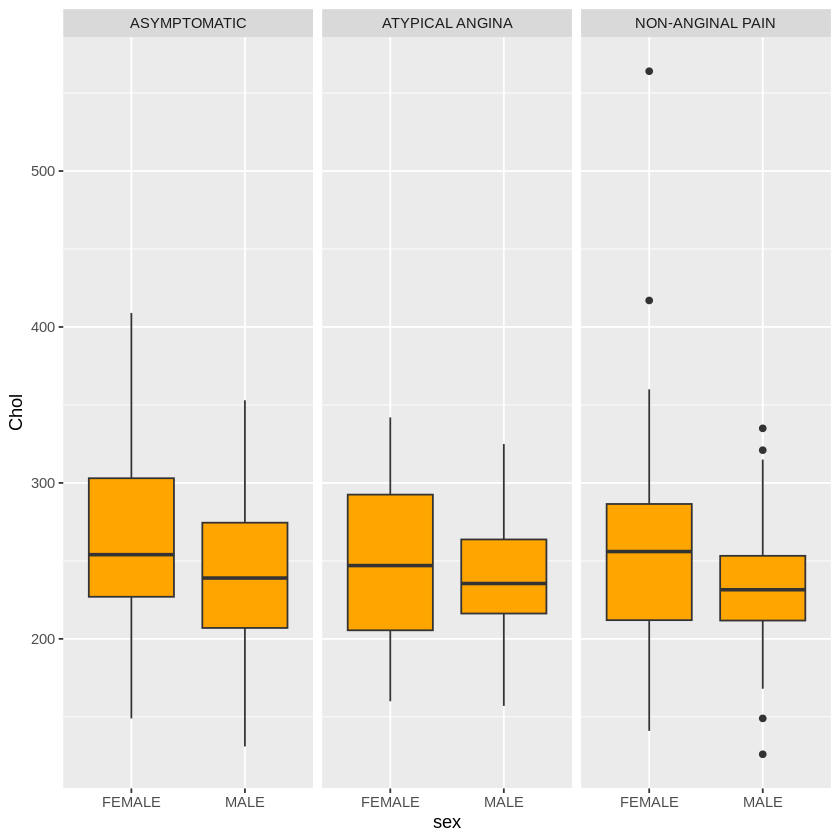

In [ ]:
# Comparing cholestrol levels across chest pain
data2 %>%
ggplot(aes(x=sex, y=chol))+
geom_boxplot(fill ='orange')+
xlab('sex')+
ylab('Chol')+
facet_grid(~cp)


In [ ]:
# T-test for testing persons resting blood pressure
x = data2[c('trestbps')]
t.test(x, mu = 135, alternative = 'two.sided')



	One Sample t-test

data:  x
t = -3.351, df = 302, p-value = 0.0009076
alternative hypothesis: true mean is not equal to 135
95 percent confidence interval:
 129.6411 133.6065
sample estimates:
mean of x 
 131.6238 


H0: Mean of given data is equal to 135mm of Hg

H1: Mean of given data is not equal to 135mm of Hg

LOS: 5%

As seen from the above output, the p-value is less than 0.05, indicating that the mean of the given data is significantly different from the
given value of 135 mm Hg. Therefore, we reject the null hypothesis H0 i.e. mean of given data is not equal to 135mm of Hg.

In [ ]:
# T- test for person’s oldpeak (ST depression induced by exercise relative to rest)
x2 = data2[c('oldpeak')]
t.test(x2, mu = 3, alternative = 'two.sided')



	One Sample t-test

data:  x2
t = -29.39, df = 302, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 3
95 percent confidence interval:
 0.9083444 1.1708635
sample estimates:
mean of x 
 1.039604 


H0: Mean of the given data is equal to 3

H1: Mean of the given data is not equal to 3

LOS: 5%

As seen above, the p-value is less than 0.05, indicating that the mean of the given data is significantly different from the given value of 3.
Therefore, we reject the null hypothesis H0 i.e. mean of the given data is not equal to 3.

In [ ]:
# T test for persons thalach results
x3 = data2[c('thalach')]
mean_age = mean(data2$age)
mean_age
t.test(x3, mu = 200 - mean_age, alternative = 'two.sided')


[1] 54.36634


	One Sample t-test

data:  x3
t = 3.0499, df = 302, p-value = 0.002492
alternative hypothesis: true mean is not equal to 145.6337
95 percent confidence interval:
 147.0574 152.2363
sample estimates:
mean of x 
 149.6469 


H0: Mean of “Thalach” = 200 - Average age

H1: Mean of “Thalach” is not = 149.999

LOS: 5%

As seen above, the p-value is less than 0.05, indicating that the mean of the given data is significantly different from the given value of '200 -
Average age'. Therefore, we reject the null hypothesis H0 i.e. mean of thalach is not equal to 149.999.

In [ ]:
# Chi square test of independence between gender and fasting blood sugar
tbl = xtabs(~ sex + fbs , data=data2)
chisq.test(tbl)



	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl
X-squared = 0.3724, df = 1, p-value = 0.5417


H0: Gender and Fasting Blood Sugar are not statistically significant

H1: Gender and Fasting Blood Sugar are statistically significant

LOS: 5%

The p value returned after running Pearson's Chi-Squared test indicates that the two attributes under consideration are statistically
insignificant (p>0.05) and hence we do not reject H0 i.e. gender and fasting blood sugar are independent or not statistically significant.

In [ ]:
# # Chi square test of independence between gender and exercise induced angina
tbl = xtabs(~ sex + exang , data=data2)
chisq.test(tbl)



	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl
X-squared = 5.4489, df = 1, p-value = 0.01958


H0: Gender and Exercise Induced Angina are not statistically significant

H1: Gender and Exercise Induced Angina are statistically significant

LOS: 5%

The p value returned after running Pearson's Chi-Squared test indicates that the two attributes under consideration are statistically
significant (p< 0.05) and hence we do not reject H0 i.e. gender and exercise induced angina are not independent or statistically significant.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



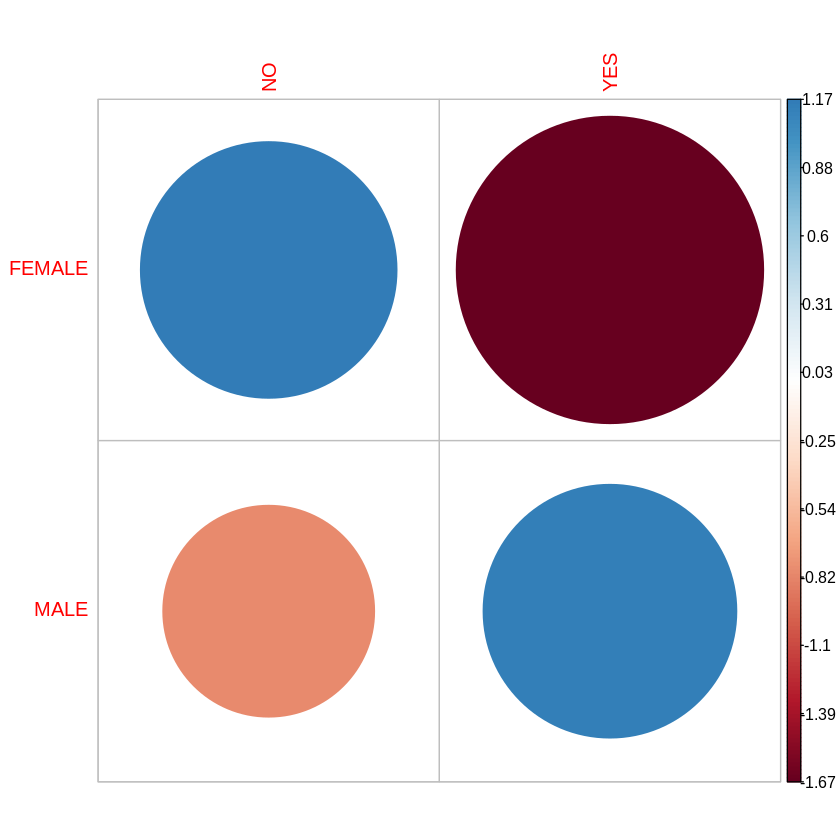

In [ ]:
# PEARSON RESIDUALS (EXERCISE INDUCED ANGINA V/S GENDER)
install.packages('corrplot')
library(corrplot)
chisq = chisq.test(tbl)
corrplot(chisq$residuals, is.cor= FALSE)


Positive residuals are in blue

Negative residuals are in red

The above graph suggest strong negative association between females and exang (Exercise induced angina)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




     sex
exang FEMALE MALE
  NO      74  130
  YES     22   77

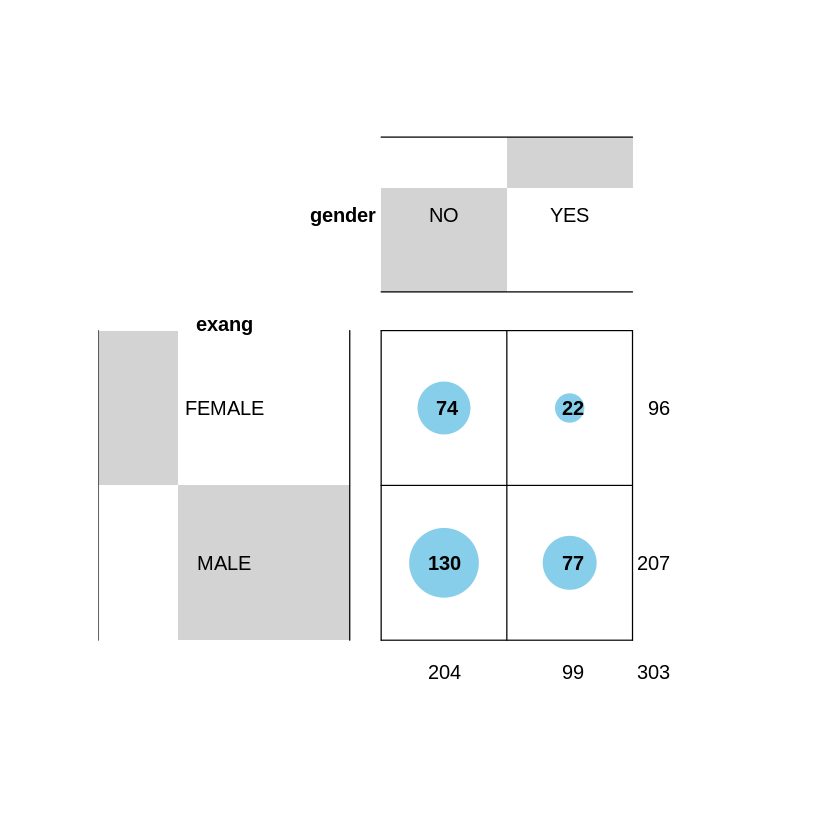

In [ ]:
# BALLOON PLOT (EXERCISE INDUCED ANGINA VS GENDER)
install.packages('gplots')
library(gplots)
heart = as.table(as.matrix(tbl))
t(heart)
balloonplot(t(heart),
main="",xlab="gender",ylab="exang",label=TRUE,show.margins=TRUE)

In [ ]:
# HYPOTHESES TEST FOR EQUALITY OF VARIANCES BETWEEN THE MAXIMUM HEART RATES ACHIEVED BY SEX USING F STATISTIC
var.test(thalach~sex, data=data2)



	F test to compare two variances

data:  thalach by sex
F = 0.69023, num df = 95, denom df = 206, p-value = 0.04168
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4940988 0.9859159
sample estimates:
ratio of variances 
         0.6902308 


H0: The variance of the maximum heart rate achieved in males is equal to the variance of the maximum heart rate achieved in females

H1: The variance of the the maximum heart rate achieved in males is not equal to the variance of the maximum heart rate achieved in
females

LOS: 5%

Since the p-value is slightly less than our level of significance, we reject the null hypothesis and conclude that the variance of the maximum
heart rate achieved in males is not equal to the variance of the maximum heart rate achieved in females.


In [ ]:
# HYPOTHESES TEST FOR EQUALITY OF VARIANCES BETWEEN THE RESTING BLOOD PRESSURE LEVELS BY SEX USING F STATISTIC
var.test(trestbps~sex, data=data2)



	F test to compare two variances

data:  trestbps by sex
F = 1.3439, num df = 95, denom df = 206, p-value = 0.08328
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9620015 1.9195605
sample estimates:
ratio of variances 
          1.343867 


H0: The variance of the resting blood pressure levels in males is equal to the variance of the resting blood pressure levels in females

H1: The variance of the resting blood pressure levels in males is not equal to the variance of the resting blood pressure levels in females

LOS: 5%

Since the p-value is slightly much greater than our level of significance, we do reject the null hypothesis and conclude that the variance of the
resting blood pressure levels in males is equal to the variance of the resting blood pressure levels in females.


In [ ]:
# HYPOTHESES TEST FOR EQUALITY OF VARIANCES BETWEEN THE CHOLESTEROL LEVELS BY SEX USING F STATISTIC
var.test(chol~sex, data=data2)


	F test to compare two variances

data:  chol by sex
F = 2.3146, num df = 95, denom df = 206, p-value = 6.144e-07
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.656929 3.306206
sample estimates:
ratio of variances 
          2.314645 


H0: The variance of cholesterol levels in males is equal to the variance of cholesterol levels in females

H1: The variance of cholesterol levels males is not equal to the variance of cholesterol levels in females

LOS: 5%

Since the p-value is far less than our level of significance, we reject the null hypothesis and conclude that the variance of cholesterol levels in
males is not equal to the variance of cholesterol levels in females.


In [ ]:
# Correlation between pairs of variables in the dataset
cor_heart = cor(data)
cor_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00000000,-0.09844660,-0.06865302,0.27935091,0.213677957,0.121307648,-0.11621090,-0.398521938,0.09680083,0.210012567,-0.16881424,0.27632624,0.06800138,-0.22543872
sex,-0.09844660,1.00000000,-0.04935288,-0.05676882,-0.197912174,0.045031789,-0.05819627,-0.044019908,0.14166381,0.096092877,-0.03071057,0.11826141,0.21004110,-0.28093658
cp,-0.06865302,-0.04935288,1.00000000,0.04760776,-0.076904391,0.094444035,0.04442059,0.295762125,-0.39428027,-0.149230158,0.11971659,-0.18105303,-0.16173557,0.43379826
trestbps,0.27935091,-0.05676882,0.04760776,1.00000000,0.123174207,0.177530542,-0.11410279,-0.046697728,0.06761612,0.193216472,-0.12147458,0.10138899,0.06220989,-0.14493113
chol,0.21367796,-0.19791217,-0.07690439,0.12317421,1.000000000,0.013293602,-0.15104008,-0.009939839,0.06702278,0.053951920,-0.00403777,0.07051093,0.09880299,-0.08523911
fbs,0.12130765,0.04503179,0.09444403,0.17753054,0.013293602,1.000000000,-0.08418905,-0.008567107,0.02566515,0.005747223,-0.05989418,0.13797933,-0.03201934,-0.02804576
restecg,-0.11621090,-0.05819627,0.04442059,-0.11410279,-0.151040078,-0.084189054,1.00000000,0.044123444,-0.07073286,-0.058770226,0.09304482,-0.07204243,-0.01198140,0.13722950
thalach,-0.39852194,-0.04401991,0.29576212,-0.04669773,-0.009939839,-0.008567107,0.04412344,1.000000000,-0.37881209,-0.344186948,0.38678441,-0.21317693,-0.09643913,0.42174093
exang,0.09680083,0.14166381,-0.39428027,0.06761612,0.067022783,0.025665147,-0.07073286,-0.378812094,1.00000000,0.288222808,-0.25774837,0.11573938,0.20675379,-0.43675708
oldpeak,0.21001257,0.09609288,-0.14923016,0.19321647,0.053951920,0.005747223,-0.05877023,-0.344186948,0.28822281,1.000000000,-0.57753682,0.22268232,0.21024413,-0.43069600


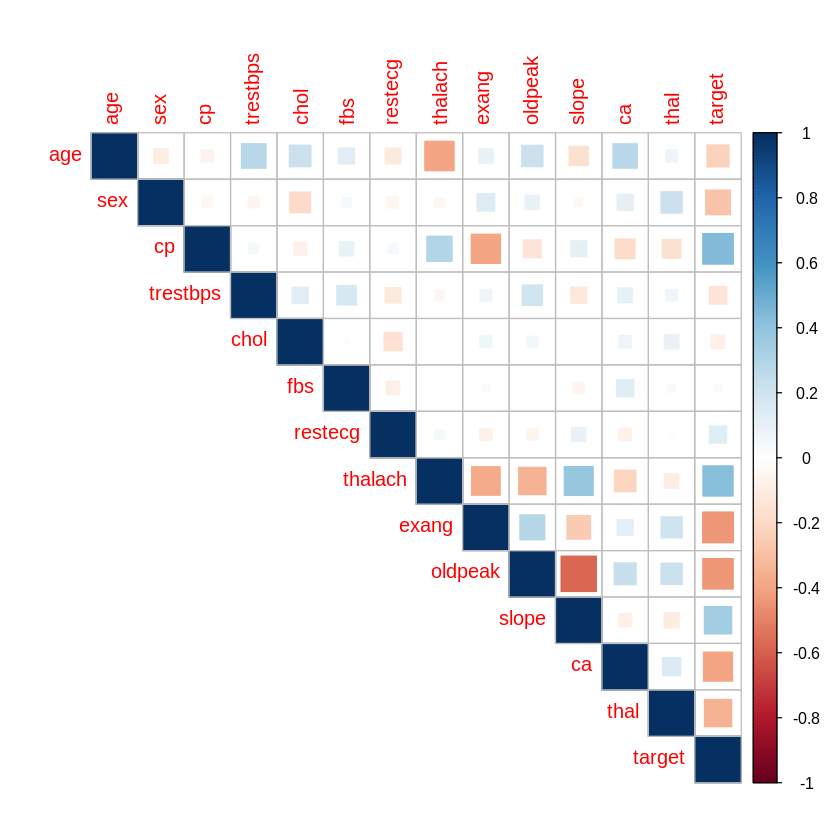

In [ ]:
corrplot(cor_heart, method = 'square', type = 'upper')


#### One Way ANOVA

(1.) We first try to analyze if there is a difference in the means of cholesterol levels of individuals, grouped by their result based on the measure
of blood flow to the heart indicated by the thallium stress test. The results of the thallium stress test

(thal) are categorized into three different groups: Normal, Fixed Defect, Reversible Defect. These groups are taken as treatments for the
analysis.

H0: There is no significant difference between the means of cholesterol levels of different treatments

H1: There is significant difference between the means of cholesterol levels of different treatments


[1] "Normal"            "Fixed Defect"      "Reversible defect"

Normal      Fixed Defect Reversible defect 
         225.3000          246.0482          250.1538

             Df Sum Sq Mean Sq F value Pr(>F)
thal_result   2  10568    5284    1.98   0.14
Residuals   300 800733    2669               

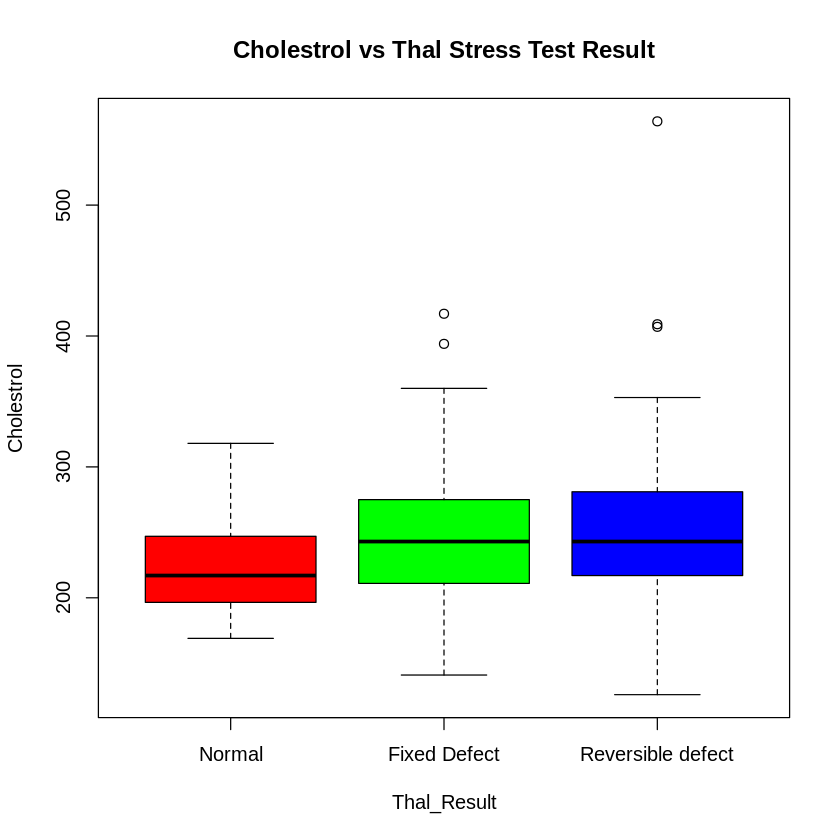

In [ ]:
levels(data2$thal) = c('Normal','Normal','Fixed Defect','Reversible defect')
view(data2$thal)
levels(data2$thal)
chol_level = data2$chol
thal_result = data2$thal
tapply(chol_level, thal_result, mean)
boxplot(chol_level~thal_result, main = "Cholestrol vs Thal Stress Test Result", xlab = "Thal_Result", ylab = "Cholestrol", col = rainbow(3))
result = aov(chol_level~thal_result)
summary(result)

Since the p-value of the F statistic is greater than 0.05, we do not reject the null hypothesis. This states that there is no significant difference
between the mean cholesterol levels across treatments.

(2.) We try to analyze if there is a difference in the means of resting blood pressure of individuals grouped by their result based on Exercise
Induced Angina. The results of Exercise Induced Angina are categorized into two different groups - those who reported pain and those who did
not, broadly framed here as YES and NO. These groups are taken as treatments for the analysis.

H0: There is no significant difference between the means of BP readings under different treatments

H1: There is significant difference between the means of BP readings under different treatments


'data.frame':	303 obs. of  14 variables:
 $ target  : Factor w/ 2 levels "NO","YES": 2 2 2 2 2 2 2 2 2 2 ...
 $ sex     : Factor w/ 2 levels "FEMALE","MALE": 2 2 1 2 1 2 1 2 2 2 ...
 $ fbs     : Factor w/ 2 levels "<=120",">120": 2 1 1 1 1 1 1 1 2 1 ...
 $ exang   : Factor w/ 2 levels "NO","YES": 1 1 1 1 2 1 1 1 1 1 ...
 $ restecg : Factor w/ 3 levels "ABNORMALITY",..: 2 1 2 1 1 1 2 1 1 1 ...
 $ slope   : Factor w/ 3 levels "0","1","2": 1 1 3 3 3 2 2 3 3 3 ...
 $ ca      : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ thal    : Factor w/ 3 levels "Normal","Fixed Defect",..: 1 2 2 2 2 1 2 3 3 2 ...
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ cp      : Factor w/ 3 levels "ASYMPTOMATIC",..: 1 3 2 2 1 1 2 2 3 3 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...


NO      YES 
130.7990 133.3232

             Df Sum Sq Mean Sq F value Pr(>F)
exinang       1    425   424.7   1.382  0.241
Residuals   301  92466   307.2               

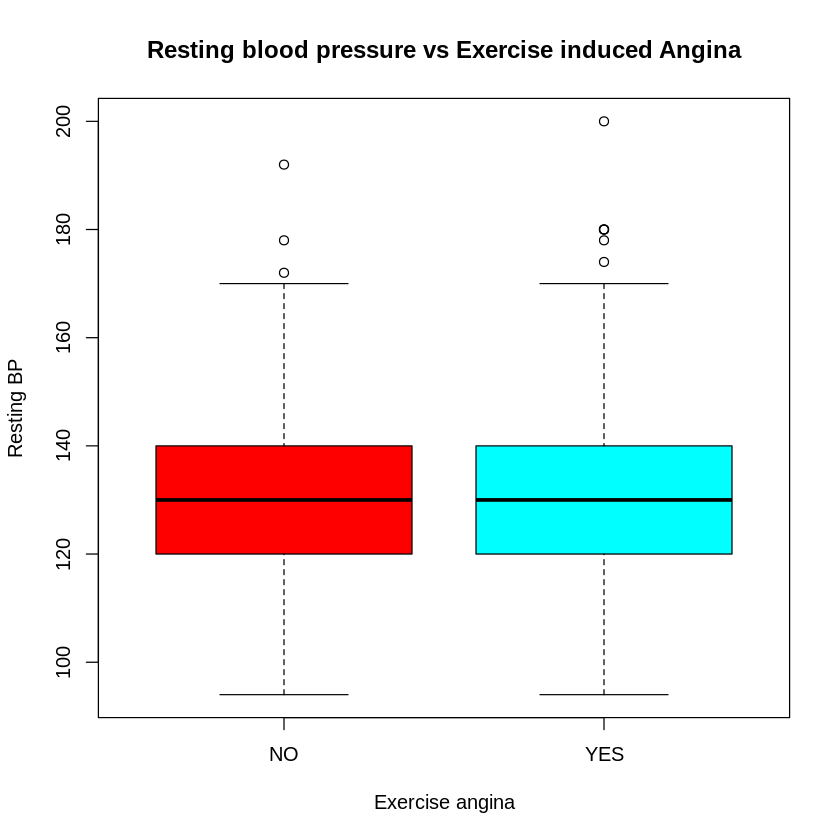

In [ ]:
bp = data2$trestbps
exinang = as.factor(data2$exang)
str(data2)
tapply(bp, exinang, mean)
boxplot(bp~exinang, main = "Resting blood pressure vs Exercise induced Angina", xlab = "Exercise angina", ylab = "Resting BP", col = rainbow(2))
result2 = aov(bp~exinang)
summary(result2)


Since the p-value of the F statistic (0.241) is greater than 0.05, we do not reject the null hypothesis. This states that there is no significant
difference between the mean BP levels across treatments.


#### Limitations:

1. Data has been interpreted from a third party source as provided from the dataset and hence interpretations subjective due to lack of
complete availability of information.

2. Assumptions of tests such as the chi square tests, t tests, F tests, etc conducted by us may not be satisfied.

####Conclusions:-

1. The average resting blood pressure of an individual from our sample differs significantly from the average resting blood pressure of the
population.

2. The average oldpeak of an individual in the given data (sample) is significantly different from the average old peak of the population.

3. Age and resting blood pressure were observed to be weakly correlated. Age and maximum heart rate achieved, and maximum heart rate
achieved and ECG readings indicating blood flow quality to the heart are negatively correlated.

4. There was no significant difference observed between the mean cholesterol levels of individuals grouped by their Thallium stress test
result. Similarly, no significant difference was found between the mean blood pressure levels of individuals grouped by their responses
with respect to exercise induced angina.

5. Gender and exercise induced angina are statistically significant whereas gender and fasting blood sugar was found to be statistically
insignificant.

6. There is a significant relation between cholestrol levels and heart diseases. While it was also noted that age and cholestrol levels were not
dependent.

7. The mean of the thalach test for the given dataset doesn't lie in the average range of (200 - age of the person)

8. Age and the old peak value of a person were found to be dependent of each other.
